In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#  Data Importing and Extraction

In [2]:
raw = pd.read_csv('datasets/training.zip', compression='zip', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('datasets/test.zip', compression='zip', header=0, sep=',', quotechar='"')

In [7]:
raw.head()
raw.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [9]:
# Null value filled with previous data to avoid loss of data
raw.fillna(method = "ffill",inplace=True)
raw.isnull().any().value_counts()
raw.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.358588,37.649140,30.306631,37.975901,59.224060,36.675731,73.746775,35.619961,37.214171,38.942849,22.162446,39.588348,54.194620,29.774418,80.468907,28.534791,38.954169,32.070739,15.138279,34.188305,48.374186,62.715884,69.586932,73.195985,33.799680,76.964546,50.425299,74.982529,48.565976,78.979256
std,3.447098,3.152072,3.083087,3.032590,1.537961,1.581946,1.961901,2.184829,1.393110,1.470456,1.747700,1.972413,2.370622,1.777130,2.398672,2.314226,1.846922,2.507250,2.140417,3.407792,4.280038,5.720567,4.932241,3.242852,2.350229,2.578721,2.543271,3.294983,4.266848,5.406621
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082643,35.900605,28.782316,36.327178,59.255347,36.065143,73.942694,34.624653,37.478531,39.355685,22.056816,39.645538,53.299787,29.987657,80.947787,27.977535,38.779298,31.430071,14.798890,32.994798,46.602370,59.292697,65.731401,71.862041,34.232759,77.339429,49.471414,75.963592,46.571821,75.553726
50%,66.493907,37.526919,30.253135,37.812736,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,48.424713,63.451421,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.588662,78.704640
75%,68.024628,39.254400,31.768407,39.565928,59.255347,36.499692,73.942694,35.902613,37.478531,39.398041,22.056816,40.330122,54.311385,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,50.330437,66.492686,72.600433,72.591200,34.232759,77.339429,51.599453,75.963592,50.676559,82.236528
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [10]:
# Creation of Images from raw data for Model training and testing to detect the facial Landmarks

images = []
for i in range(0,7049):
    img = raw["Image"][i].split(" ")
    img = ['0' if x ==" " else x for x in img]
    images.append(img)

images = np.array(images,dtype='float')
images.shape

(7049, 9216)

In [11]:
# Dropping First axis values
training = raw.drop(["Image"],axis=1)
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [12]:
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)
ytrain = np.array(y_train,dtype = 'float')

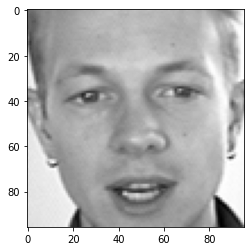

In [13]:
# Shaping the Images uniformly for our model to get trained on.
xtrain = images.reshape(-1,96,96)
plt.imshow(xtrain[91].reshape(96,96),cmap='gray')
plt.show()

# Converting Image color range(0,255) into range (0,1)
for row in images:
    row/=255

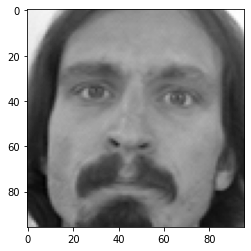

In [17]:
# lets have a look at our images
plt.imshow(images[0].reshape(96,96),cmap='gray')
plt.show()

In [18]:
training = raw.drop(["Image"],axis=1)
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


# Model Creation and Training

In [19]:
# Model 2
# Final Modal

model = Sequential()
model.add(Convolution2D(32, (3, 3) ,activation='relu', input_shape=(96, 96, 1)))
model.add(Convolution2D(32, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0

In [20]:
# Used MSE for as loss function as it adresses Outlined data well.
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae',"accuracy"])

images=images.reshape(-1,96,96,1)
images.shape

(7049, 96, 96, 1)

In [25]:
history = model.fit(images, ytrain,epochs = 100,batch_size = 255,validation_split = 0.2)

Epoch 1/100
23/23 [==============================] - 4s 159ms/step - loss: 51.6815 - mae: 3.1499 - accuracy: 0.7306 - val_loss: 160.9874 - val_mae: 11.0884 - val_accuracy: 0.7177
Epoch 2/100
23/23 [==============================] - 4s 158ms/step - loss: 52.7855 - mae: 3.2562 - accuracy: 0.7173 - val_loss: 120.8209 - val_mae: 9.0976 - val_accuracy: 0.7050
Epoch 3/100
23/23 [==============================] - 4s 159ms/step - loss: 52.2383 - mae: 3.2249 - accuracy: 0.7297 - val_loss: 172.0056 - val_mae: 11.5730 - val_accuracy: 0.7234
Epoch 4/100
23/23 [==============================] - 4s 160ms/step - loss: 51.8486 - mae: 3.1713 - accuracy: 0.7370 - val_loss: 179.8980 - val_mae: 11.8619 - val_accuracy: 0.7121
Epoch 5/100
23/23 [==============================] - 4s 161ms/step - loss: 51.5838 - mae: 3.1332 - accuracy: 0.7292 - val_loss: 178.7822 - val_mae: 11.8448 - val_accuracy: 0.7128
Epoch 6/100
23/23 [==============================] - 4s 162ms/step - loss: 52.0402 - mae: 3.1809 - accurac

In [4]:
#model.save("facial_keypoints_model_100Epocs.h5")
model = tf.keras.models.load_model('models/facial_keypoints_model_100Epocs.h5')

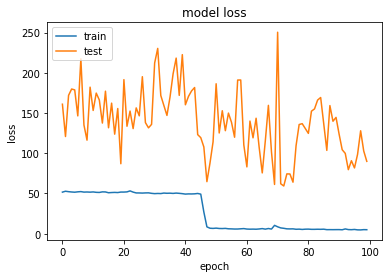

In [30]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

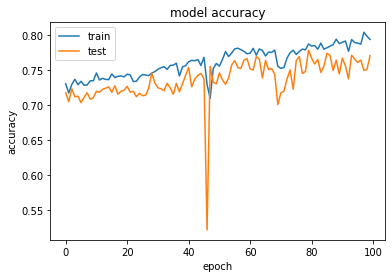

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
# for key in history.history.keys():
#     print(key)

In [74]:
test_data.head()
testy = test_data
testdata = testy["Image"]
testimages = []
for i in range(0,1783):
    img = raw["Image"][i].split(" ")
    img = ['0' if x ==" " else x for x in img]
    testimages.append(img)
testimages = np.array(testimages,dtype="float")
testimages/=255
testimages = testimages.reshape(-1,96,96,1)
testimages.shape

(1783, 96, 96, 1)

In [6]:
result = model.predict(testimages,verbose=1)

56/56 [==============================] - 15s 267ms/step


In [61]:
# plt.imshow(testimages[178].reshape(96,96),cmap='gray')
# plt.show()

In [28]:
result.shape
result[0]

(1783, 30)

In [ ]:
# imagenum=1746
# image=(testimages[imagenum].reshape(96,96)).copy()
# plt.imshow(image)
# plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
# plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)
# plt.show()

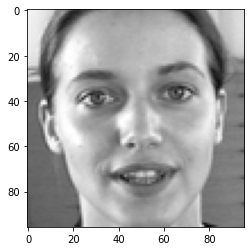

<ipython-input-87-5b595299d02d>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  image=cv2.circle(image, (result[imagenum][i*2],result[imagenum][i*2+1]), 1,255,-1)


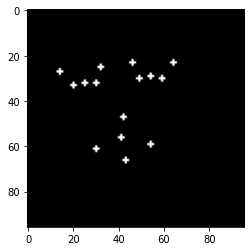

In [87]:
imagenum=20
image=(testimages[imagenum].reshape(96,96)).copy()
plt.imshow(image.reshape(96,96),cmap='gray')
plt.show()
for i in range(0,15):
  image=cv2.circle(image, (result[imagenum][i*2],result[imagenum][i*2+1]), 1,255,-1)
plt.imshow(image.reshape(96,96),cmap='gray')
plt.show()

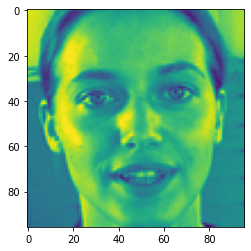

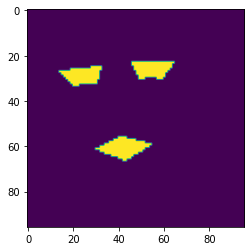

In [88]:
imagesampleno=20

data=result[imagesampleno]
left_eye=[[int(data[0]),int(data[1])],[int(data[4]),int(data[5])],[int(data[12]),int(data[13])],[int(data[14]),int(data[15])],[int(data[6]),int(data[7])]]
right_eye=[[int(data[2]),int(data[3])],[int(data[8]),int(data[9])],[int(data[16]),int(data[17])],[int(data[18]),int(data[19])],[int(data[10]),int(data[11])]]
mouth=[[int(data[28]),int(data[29])],[int(data[24]),int(data[25])],[int(data[26]),int(data[27])],[int(data[22]),int(data[23])]]

img = testimages[imagesampleno].copy()
plt.imshow(img.reshape(96,96))
plt.show()
area1 = np.array(left_eye)
area2 = np.array(right_eye)
area3 = np.array(mouth)
img=cv2.fillPoly(img, [area1,area2,area3], (255, 255, 255))

plt.imshow(img.reshape(96,96))
plt.show()